### Assignment 1 Simple linear regression 
Building a prediction model for Salary_hike


In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### so, with the help of this we'll get to know , there are no null values present in the data

#### Now we'll check the outliers from each atributes , so for that we need to import visualisation libraries

In [4]:
import matplotlib.pyplot as plt

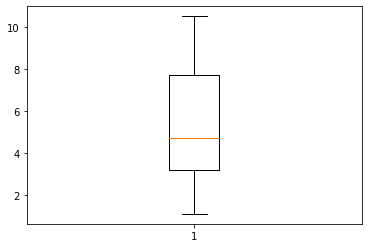

In [5]:
plt.boxplot(data['YearsExperience'])
plt.show()

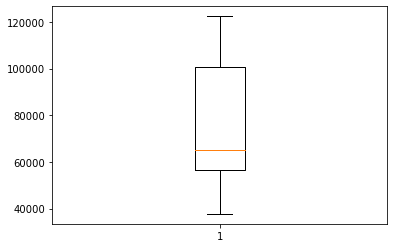

In [6]:
plt.boxplot(data['Salary'])
plt.show()

In [7]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

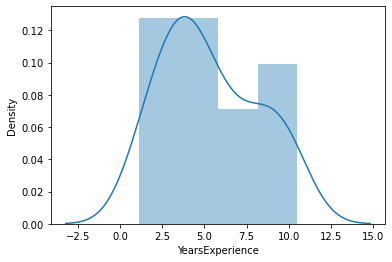

In [8]:
sns.distplot(data['YearsExperience'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

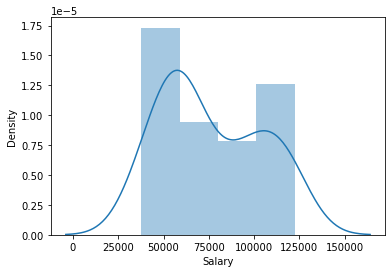

In [9]:
sns.distplot(data['Salary'])

#### With this we'll get to know that the Data is Normally Distributed,there are no much outliers in the Sorting atribute on which we are going to perform our test 

### Now we'll check the corelation between Attributes

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Hear we can say ,there is a strong relation between Delivery time and Sorting Time because r valuve is > 0.8

## Developing a Model -Trail 1
 


#### Develping a model using ols

In [11]:
import statsmodels.formula.api as smf

In [12]:
data = data.rename({'YearsExperience': 'YE','Salary': 'S'}, axis=1)

In [13]:
data.head()

,YE,S
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
model1=smf.ols('S~YE',data=data).fit()

In [29]:
model1.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

#### These are the Parameters of the model 1 (Y = mX +c)

In [30]:
model1.rsquared 

0.9569566641435086

####  r squared value of model 1

In [31]:
model1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.14e-20
Time:                        10:36:06   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YE', ylabel='S'>

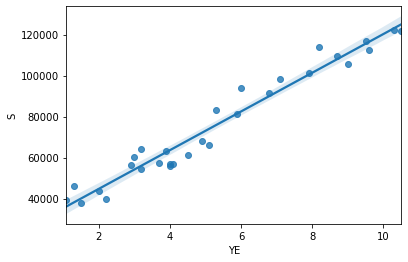

In [19]:
sns.regplot(data.YE,data.S)

In [32]:
model1.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [33]:
model1.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [34]:
predict1=model1.predict()

In [35]:
rmse1=np.sqrt(np.mean((np.array([data.S])-np.array(predict1))**2))
rmse1

5592.043608760662

#### Here from above OLS regression results R-Squared value is 0.957 which  greater than 0.85 hence IT IS GOOD MODEL  we'll also check for other models even say ,

### Developing another by using log function

### MODEL - 2

In [36]:
model2=smf.ols('S~np.log(YE)',data=data).fit()

In [37]:
model2.params

Intercept     14927.97177
np.log(YE)    40581.98796
dtype: float64

In [38]:
model2.rsquared 

0.8538888828756969

In [39]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 31 May 2021   Prob (F-statistic):           3.25e-13
Time:                        10:39:58   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YE)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
predict2=model2.predict()
predict2


array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

In [41]:
rmse2=np.sqrt(np.mean((np.array([data.S])-np.array(predict2))**2))
rmse2

10302.893706228308

#### Here from above OLS regression results R-Squared value is 0.854 which is also GOOD 

### MODEL - 3

In [42]:
model3 = smf.ols('np.log(S)~YE', data = data).fit()

In [44]:
model3.params

Intercept    10.507402
YE            0.125453
dtype: float64

In [45]:
model3.rsquared 

0.9319671194084195

In [46]:
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(S)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 31 May 2021   Prob (F-statistic):           7.03e-18
Time:                        10:41:34   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YE             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
predict3=model3.predict()
predict3

array([10.64540007, 10.67049065, 10.69558123, 10.75830768, 10.78339825,
       10.87121528, 10.88376056, 10.90885114, 10.90885114, 10.97157759,
       10.99666816, 11.00921345, 11.00921345, 11.02175874, 11.0719399 ,
       11.12212105, 11.14721163, 11.17230221, 11.24757394, 11.26011923,
       11.36048154, 11.39811741, 11.49847972, 11.53611559, 11.59884203,
       11.6364779 , 11.69920434, 11.71174963, 11.79956666, 11.82465723])

In [48]:
rmse3=np.sqrt(np.mean((np.array([data.S])-np.array(predict3))**2))
rmse3

80630.25750602805

### MODEL- 4

In [49]:
model4 = smf.ols('S~np.sqrt(YE)', data = data).fit()

In [50]:
model4.params

Intercept     -16055.769117
np.sqrt(YE)    41500.680583
dtype: float64

In [51]:
model4.rsquared 

0.9310009544993526

In [52]:
model4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 31 May 2021   Prob (F-statistic):           8.57e-18
Time:                        10:42:10   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YE)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
predict4=model4.predict()
predict4

array([ 27470.5118836 ,  31262.2870087 ,  34771.97658636,  42635.05621127,
        45499.6877937 ,  54617.34329277,  55825.51820153,  58182.90519996,
        58182.90519996,  63772.38386657,  65901.50820807,  66945.59204909,
        66945.59204909,  67976.7043936 ,  71980.46887539,  75809.90344568,
        77665.96311819,  79485.97249857,  84749.03376584,  85599.72228969,
        92164.76555281,  94526.21888681, 100589.93917079, 102784.09460143,
       106353.65230571, 108446.27263212, 111857.91914242, 112529.38668651,
       117134.90936769, 118421.80571606])

In [55]:
rmse4=np.sqrt(np.mean((np.array([data.S])-np.array(predict4))**2))
rmse4

7080.09573498304

### Building the model & Predicting its Salary

In [58]:
newdata=pd.DataFrame({'YE':float(input('enter the years of experience'))},index=[1])

enter the years of experience 6


In [59]:
predictedsalary=model1.predict(newdata)
predictedsalary

1    82491.974127
dtype: float64



### Conclusion- Comparing between all models , model1 has higher R-squared value i.e. 0.957 as comapare to others. 

#### From the above data we know higher R-squred value and lower RMSE value gives better model.

# Hence the model1 is better model to predict Salary